In [2]:
import pandas as pd
import numpy as np
import folium
from sklearn.impute import SimpleImputer
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans
from folium.plugins import FastMarkerCluster
from geopy.geocoders import Nominatim
from geopy.point import Point

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_agencies = pd.read_csv("fatal-police-shootings-agencies.csv")

In [4]:
df_agencies.head()

,id,name,type,state,oricodes,total_shootings
0,3145,Abbeville County Sheriff's Office,sheriff,SC,SC00100,1
1,2576,Aberdeen Police Department,local_police,WA,WA01401,1
2,2114,Abilene Police Department,local_police,TX,TX22101,3
3,2088,Abington Township Police Department,local_police,PA,PA04601,1
4,3187,Acadia Parish Sheriff's Office,sheriff,LA,LA00100,1


In [5]:
df_agencies.columns

Index(['id', 'name', 'type', 'state', 'oricodes', 'total_shootings'], dtype='object')

In [6]:
df_agencies.shape

(3322, 6)

In [7]:
df_agencies.info

<bound method DataFrame.info of         id                                 name          type state oricodes  \
0     3145    Abbeville County Sheriff's Office       sheriff    SC  SC00100   
1     2576           Aberdeen Police Department  local_police    WA  WA01401   
2     2114            Abilene Police Department  local_police    TX  TX22101   
3     2088  Abington Township Police Department  local_police    PA  PA04601   
4     3187       Acadia Parish Sheriff's Office       sheriff    LA  LA00100   
...    ...                                  ...           ...   ...      ...   
3317   226         Yuba County Sheriff's Office       sheriff    CA  CA05800   
3318  1874     Yuma County Sheriff's Department       sheriff    AZ  AZ01400   
3319  1360               Yuma Police Department  local_police    AZ  AZ01405   
3320  3077   Zapata County Sheriff's Department       sheriff    TX  TX25300   
3321    75               Zion Police Department  local_police    IL  IL04923   

      t

In [8]:
df_agencies.describe()

,id,total_shootings
count,3322.000000,3322.000000
mean,2933.003010,2.839253
std,4312.615462,6.069312
min,1.000000,1.000000
25%,1206.250000,1.000000
50%,2098.500000,1.000000
75%,2995.750000,2.000000
max,28842.000000,129.000000


In [9]:
df_agencies.isnull().sum()

id                   0
name                 0
type                 0
state                0
oricodes           103
total_shootings      0
dtype: int64

In [10]:
df = pd.read_csv("fatal-police-shootings-data.csv")

In [11]:
df.head()

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53.0,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,not_available,Lewis Lee Lembke,47.0,male,W,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,John Paul Quintero,23.0,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,Matthew Hoffman,32.0,male,W,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,not_available,Michael Rodriguez,39.0,male,H,not_available,False,False,473


In [12]:
df.columns

Index(['id', 'date', 'threat_type', 'flee_status', 'armed_with', 'city',
       'county', 'state', 'latitude', 'longitude', 'location_precision',
       'name', 'age', 'gender', 'race', 'race_source',
       'was_mental_illness_related', 'body_camera', 'agency_ids'],
      dtype='object')

In [13]:
df.shape

(8770, 19)

In [14]:
df.info

<bound method DataFrame.info of         id        date threat_type flee_status    armed_with           city  \
0        3  2015-01-02       point         not           gun        Shelton   
1        4  2015-01-02       point         not           gun          Aloha   
2        5  2015-01-03        move         not       unarmed        Wichita   
3        8  2015-01-04       point         not       replica  San Francisco   
4        9  2015-01-04       point         not         other          Evans   
...    ...         ...         ...         ...           ...            ...   
8765  9514  2023-10-02      threat         not         knife         Manteo   
8766  9515  2023-10-02       shoot         NaN           gun   Philadelphia   
8767  9513  2023-10-03        move         NaN  undetermined  Lawrenceville   
8768  9520  2023-10-06      threat         NaN           gun       Cut Bank   
8769  9521  2023-10-07       shoot         car           gun            NaN   

             county

In [15]:
df.describe()

,id,latitude,longitude,age
count,8770.000000,7781.000000,7.781000e+03,8165.000000
mean,4830.229989,36.642906,-1.157586e+12,37.291611
std,2734.402887,5.346667,1.021106e+14,12.991756
min,3.000000,19.497503,-9.007175e+15,2.000000
25%,2459.250000,33.471908,-1.120139e+02,27.000000
50%,4858.500000,36.081172,-9.425810e+01,35.000000
75%,7194.750000,39.998740,-8.318308e+01,45.000000
max,9521.000000,71.301255,-6.786717e+01,92.000000


In [16]:
# Check for missing values 
df.isnull().sum()

id                               0
date                             0
threat_type                     47
flee_status                   1191
armed_with                     210
city                            58
county                        4856
state                            0
latitude                       989
longitude                      989
location_precision             989
name                           583
age                            605
gender                          49
race                          1406
race_source                   1385
was_mental_illness_related       0
body_camera                      0
agency_ids                       0
dtype: int64

### Detecting and Removing Outliers

The initial map involved analyzing the distribution of fatal police shooting incidents across the US without accounting for outliers in the geographic data. This map shown in Figure 1 included data points outside the expected US borders, highlighting the need to refine the geographic data to focus solely on the continental US.

Following the implementation of a process to eliminate outliers, the updated map was generated. This visualization specifically filters out incidents located beyond the boundaries of the continental United States. The refined map provides a more precise and accurate representation of fatal police shooting incidents within the US geography. 

In [16]:
# Load the dataset and filter relevant columns
df = df[['latitude', 'longitude', 'city', 'state']]

# Filter out rows with missing latitude or longitude values
df = df.dropna(subset=['latitude', 'longitude'])

# Create a map centered around the US
us_map = folium.Map(location=[37.7749, -122.4194], zoom_start=4)

# Add markers for each incident
for index, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], 
                  popup=f"{row['city']}, {row['state']}").add_to(us_map)

# Save the map to an HTML file
us_map.save('us_fatal_police_shootings_map.html')

In [17]:
# Load the dataset and filter relevant columns
df = df[['latitude', 'longitude', 'city', 'state']]

# Define a bounding box for the continental United States
us_bounding_box = {
    "min_lat": 24.396308, 
    "max_lat": 49.384358, 
    "min_lon": -125.000000, 
    "max_lon": -66.934570
}

# Filter out rows outside the bounding box
df = df[(df['latitude'] >= us_bounding_box["min_lat"]) & 
        (df['latitude'] <= us_bounding_box["max_lat"]) & 
        (df['longitude'] >= us_bounding_box["min_lon"]) & 
        (df['longitude'] <= us_bounding_box["max_lon"])]

# Create a map centered around the US
us_map = folium.Map(location=[37.7749, -122.4194], zoom_start=4)

# Add markers for each incident
for index, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], 
                  popup=f"{row['city']}, {row['state']}").add_to(us_map)

# Save the map to an HTML file
us_map.save('us_fatal_police_shootings_map_after_removing_outliers.html')

This experiment aims at analyzing the correlation between latitude and longitude; the focus is on understanding patterns related to incident locations. Plotting this correlation results in a scatter plot that visually displays incident locations, providing a clearer understanding of the relationships present within the dataset.

Correlation between latitude and longitude: -0.0860408553129158


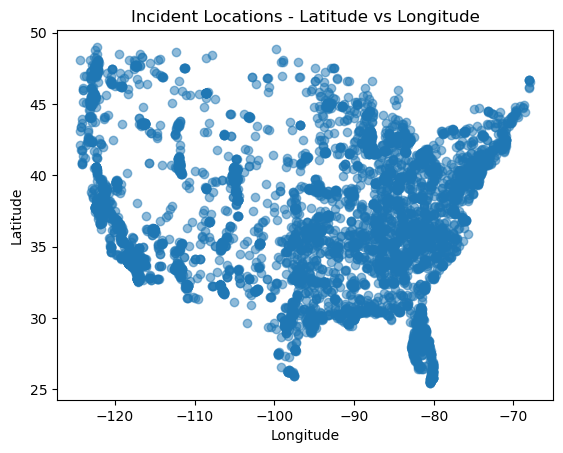

In [18]:
# Calculate the correlation between latitude and longitude
correlation = df['latitude'].corr(df['longitude'])

print(f"Correlation between latitude and longitude: {correlation}")

plt.scatter(df['longitude'], df['latitude'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Incident Locations - Latitude vs Longitude')
plt.show()

### Missing Values Imputation

Imputed missing data using specific strategies for different columns. 

Filled categorical columns (threat_type, flee_status, armed_with) with most frequent occurrences. 

For geographical columns (latitude, longitude), used the mean of available data is used for missing values. 

Replaced missing entries in the location_precision column with 'not_available'. 

Imputed missing age values using the mean or median age. 

Filled missing gender and race values with the most common occurrences in the dataset. 

In [17]:
# Columns with missing values
columns_with_missing = ['threat_type', 'flee_status', 'armed_with']

# Impute missing values using the 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')
df[columns_with_missing] = imputer.fit_transform(df[columns_with_missing])

In [18]:
# Columns with missing values
columns_with_missing = ['latitude', 'longitude']

# Initialize the imputer with strategy as 'mean' or 'median'
imputer = SimpleImputer(strategy='mean')  # You can also use 'median'

# Fill missing values in specified columns
df[columns_with_missing] = imputer.fit_transform(df[columns_with_missing])

In [19]:
# Replace missing values in 'location_precision' column with 'not_available'
df['location_precision'] = df['location_precision'].fillna('not_available')

In [20]:
# Calculate mean or median for the 'age' column
age_mean = df['age'].mean()  # or df['age'].median()

# Fill missing ages with the mean or median age
df['age'].fillna(age_mean, inplace=True)

# Calculate the mode for 'gender' and 'race' columns
most_common_gender = df['gender'].mode()[0]
most_common_race = df['race'].mode()[0]

# Fill missing genders and races with the most common values
df['gender'].fillna(most_common_gender, inplace=True)
df['race'].fillna(most_common_race, inplace=True)

In [21]:
df.head()

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53.0,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,not_available,Lewis Lee Lembke,47.0,male,W,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,John Paul Quintero,23.0,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,Matthew Hoffman,32.0,male,W,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,not_available,Michael Rodriguez,39.0,male,H,not_available,False,False,473


In [22]:
df.isnull().sum()

id                               0
date                             0
threat_type                      0
flee_status                      0
armed_with                       0
city                            58
county                        4856
state                            0
latitude                         0
longitude                        0
location_precision               0
name                           583
age                              0
gender                           0
race                             0
race_source                   1385
was_mental_illness_related       0
body_camera                      0
agency_ids                       0
dtype: int64

### Merging and Cleaning Datasets

Combined two datasets, one featuring police agencies engaged in fatal shootings since 2015 (about 3322 instances), and another detailing death records (around 8770 records). 

The merged CSV produced a combined record of 8226 entries, addressing missing or null values across multiple columns. 

In [23]:
# Convert 'agency_ids' in the main DataFrame 'df' and 'id' in the 'df_agencies' DataFrame to string for consistent data types
df['agency_ids'] = df['agency_ids'].astype(str)
df_agencies['id'] = df_agencies['id'].astype(str)

# Merge the two DataFrames, 'df' and 'df_agencies,' based on the 'agency_ids' in 'df' and 'id' in 'df_agencies'
# The 'inner' join ensures that only matching rows are included in the merged_data DataFrame
merged_data = pd.merge(df, df_agencies, left_on='agency_ids', right_on='id', how='inner')

In [24]:
merged_data.head()

,id_x,date,threat_type,flee_status,armed_with,city,county,state_x,latitude,longitude,...,race_source,was_mental_illness_related,body_camera,agency_ids,id_y,name_y,type,state_y,oricodes,total_shootings
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,...,not_available,True,False,73,73,Mason County Sheriff's Office,sheriff,WA,WA02300,3
1,758,2015-08-21,point,not,gun,Grapeview,Mason,WA,47.286345,-122.924468,...,not_available,True,False,73,73,Mason County Sheriff's Office,sheriff,WA,WA02300,3
2,5685,2020-03-24,attack,car,vehicle,Shelton,NaN,WA,47.333423,-122.958007,...,not_available,False,False,73,73,Mason County Sheriff's Office,sheriff,WA,WA02300,3
3,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,...,not_available,False,False,70,70,Washington County Sheriff's Office,sheriff,OR,OR03400,5
4,890,2015-10-02,threat,not,knife,Aloha,Washington,OR,45.492685,-122.861795,...,not_available,True,False,70,70,Washington County Sheriff's Office,sheriff,OR,OR03400,5


In [24]:
merged_data.shape

(8226, 25)

In [25]:
# Check for missing values
merged_data.isnull().sum()

id_x                             0
date                             0
threat_type                      0
flee_status                      0
armed_with                       0
city                            46
county                        4588
state_x                          0
latitude                         0
longitude                        0
location_precision               0
name_x                         550
age                              0
gender                           0
race                             0
race_source                   1283
was_mental_illness_related       0
body_camera                      0
agency_ids                       0
id_y                             0
name_y                           0
type                             0
state_y                          0
oricodes                       106
total_shootings                  0
dtype: int64

### Plot the top affected states, counties, or cities based on the given data

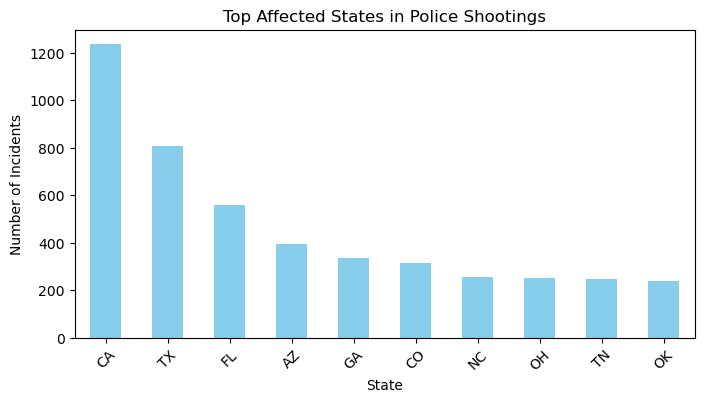

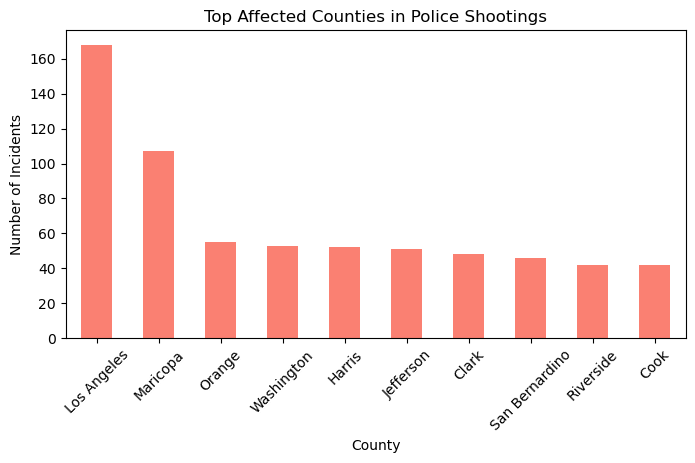

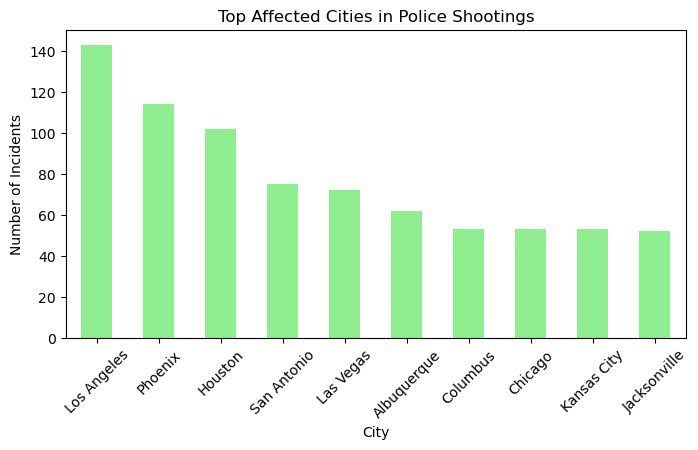

In [26]:
# Top affected states
top_states = df['state'].value_counts().head(10)

# Top affected counties
top_counties = df['county'].value_counts().head(10)

# Top affected cities
top_cities = df['city'].value_counts().head(10)

# Plotting the top affected states
plt.figure(figsize=(8, 4))
top_states.plot(kind='bar', color='skyblue')
plt.title('Top Affected States in Police Shootings')
plt.xlabel('State')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

# Plotting the top affected counties
plt.figure(figsize=(8, 4))
top_counties.plot(kind='bar', color='salmon')
plt.title('Top Affected Counties in Police Shootings')
plt.xlabel('County')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

# Plotting the top affected cities
plt.figure(figsize=(8, 4))
top_cities.plot(kind='bar', color='lightgreen')
plt.title('Top Affected Cities in Police Shootings')
plt.xlabel('City')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()


### Plotting a stacked bar chart to visually represent the racial demographics in fatal police shootings across different states

<Figure size 800x1200 with 0 Axes>

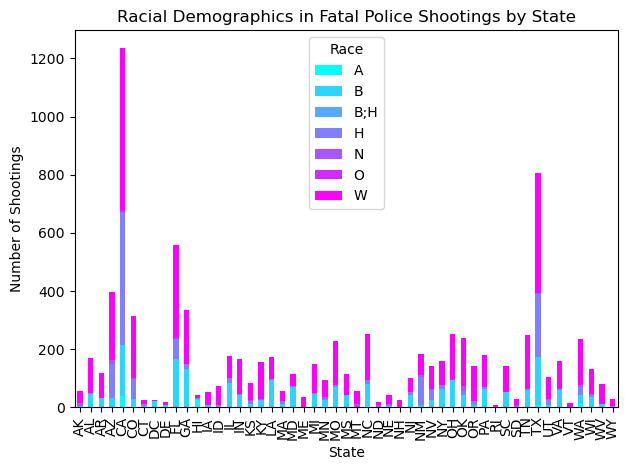

In [27]:
# Additional analysis - Grouping by state and racial demographics
state_race_counts = df.groupby(['state', 'race']).size().unstack().fillna(0)

plt.figure(figsize=(8, 12))

# Plotting the bar chart
state_race_counts.plot(kind='bar', stacked=True, colormap='cool')

plt.title('Racial Demographics in Fatal Police Shootings by State')
plt.xlabel('State')
plt.ylabel('Number of Shootings')
plt.legend(title='Race', loc='best')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Exploring Fatal Police Shootings: Racial Distribution, Armed Status by Race, and Body Camera Usage in Top Cities

The script performs the following functionalities:
 1. Groups the merged data by city and counts the number of fatal shootings in each city.
 2. Identifies the top 10 cities with the highest number of fatal shootings.
 3. Filters the dataset to include only the data from the top 10 cities.
 4. Plots a bar chart depicting the racial distribution of fatal police shootings in the top cities.
 5. Creates a heatmap illustrating the relationship between armed status and race in the top cities.
 6. Examines the distribution of body camera usage in the top cities and plots a bar chart indicating the proportion of shootings with and without body cameras.

<Figure size 1200x600 with 0 Axes>

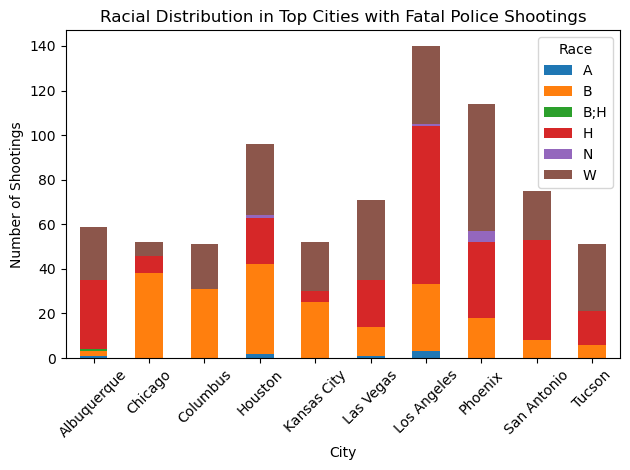

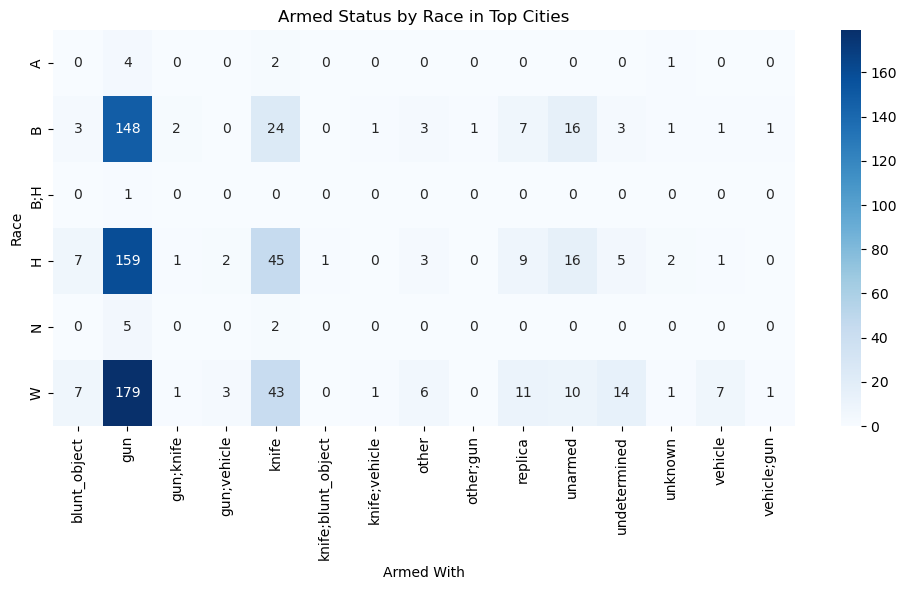

<Figure size 800x600 with 0 Axes>

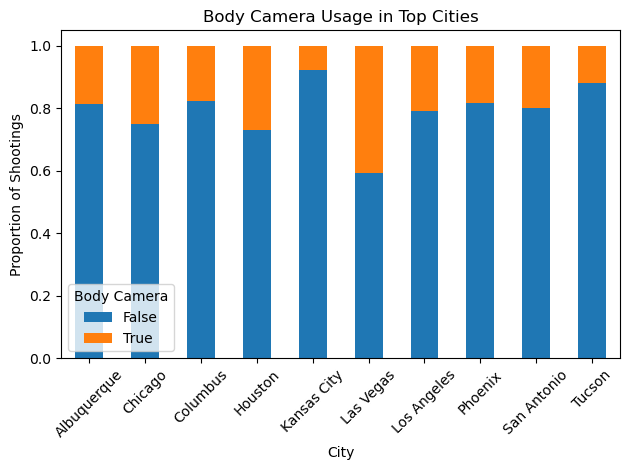

In [30]:
# Load the dataset
data = merged_data

# Group the data by city and count the number of fatal shootings in each city
city_shootings = data['city'].value_counts()

# Get top 10 cities with the most fatal shootings
top_cities = city_shootings.head(10)

# Filter the dataset for only the top cities
top_cities_data = data[data['city'].isin(top_cities.index)]

# Count the number of shootings by race in the top cities
shootings_by_race = top_cities_data.groupby(['city', 'race']).size().unstack().fillna(0)

# Plotting the racial distribution in top cities
plt.figure(figsize=(12, 6))
shootings_by_race.plot(kind='bar', stacked=True)
plt.title('Racial Distribution in Top Cities with Fatal Police Shootings')
plt.xlabel('City')
plt.ylabel('Number of Shootings')
plt.xticks(rotation=45)
plt.legend(title='Race')
plt.tight_layout()
plt.show()

# Analysing the relationship between armed status and race in the top cities
armed_by_race = top_cities_data.groupby(['race', 'armed_with']).size().unstack().fillna(0)

# Plotting armed status by race in the top cities
plt.figure(figsize=(10, 6))
sns.heatmap(armed_by_race, cmap='Blues', annot=True, fmt='g')
plt.title('Armed Status by Race in Top Cities')
plt.xlabel('Armed With')
plt.ylabel('Race')
plt.tight_layout()
plt.show()

# Investigate the distribution of body camera use in the top cities
body_camera_stats = top_cities_data.groupby('city')['body_camera'].value_counts(normalize=True).unstack().fillna(0)

# Plotting body camera usage in the top cities
plt.figure(figsize=(8, 6))
body_camera_stats.plot(kind='bar', stacked=True)
plt.title('Body Camera Usage in Top Cities')
plt.xlabel('City')
plt.ylabel('Proportion of Shootings')
plt.xticks(rotation=45)
plt.legend(title='Body Camera')
plt.tight_layout()
plt.show()


### Time Series Analysis of Fatal Police Shooting Incidents: Unveiling Trends, Seasonality, and Residuals Over Time

This script performs time series analysis on the incident frequency over time, providing insights into trends, seasonality, and residuals in the dataset. Here are the steps performed:

1. Convert the 'date' column to datetime format for time series analysis.
2. Sort the DataFrame by date to ensure chronological order.
3. Group incidents by date, counting the number of incidents for each date.
4. Set the 'date' column as the index for time series analysis.
5. Plot the time series to visualize incident frequency over time.
6. Decompose the time series into trend, seasonality, and residuals using additive decomposition.
7. Plot the decomposed components (trend, seasonal, residuals, and observed) for a comprehensive analysis.

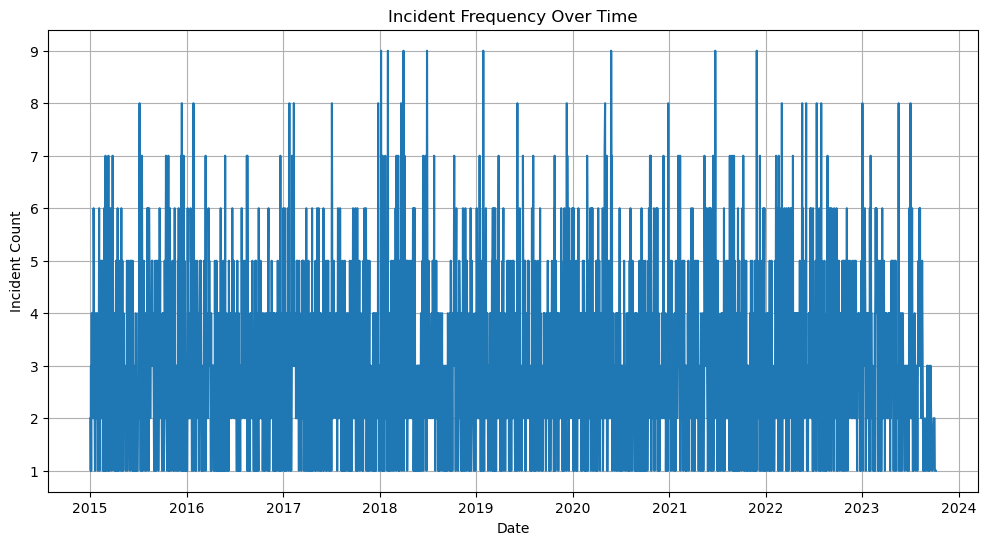

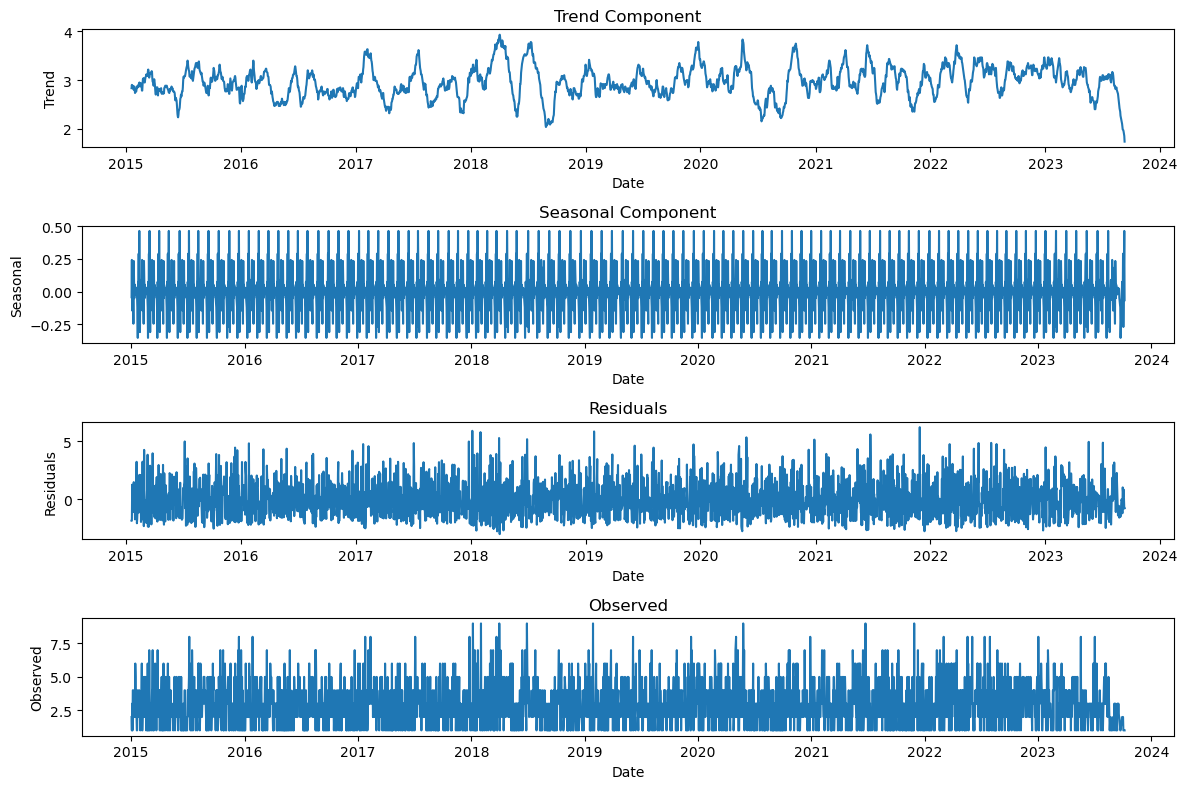

In [33]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Ensure data is sorted by date
df.sort_values('date', inplace=True)

# Group incidents by date
incident_count_by_date = df.groupby('date').size().reset_index(name='incident_count')

# Set 'date' as the index for time series analysis
incident_count_by_date.set_index('date', inplace=True)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(incident_count_by_date)
plt.title('Incident Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Incident Count')
plt.grid(True)
plt.show()

# Decompose the time series for trend, seasonality, and residuals
result = seasonal_decompose(incident_count_by_date, model='additive', period=30)  # Change the period based on your data

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.xlabel('Date')
plt.ylabel('Trend')
plt.title('Trend Component')

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.title('Seasonal Component')

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals')

plt.subplot(4, 1, 4)
plt.plot(result.observed)
plt.xlabel('Date')
plt.ylabel('Observed')
plt.title('Observed')

plt.tight_layout()
plt.show()

### Average incident count of fatal police shootings by month

The script performs the following functionalities:

1. Groups the DataFrame by month and calculate the mean incident count for each month 
2. Plots the average incident count for each month using matplotlib.

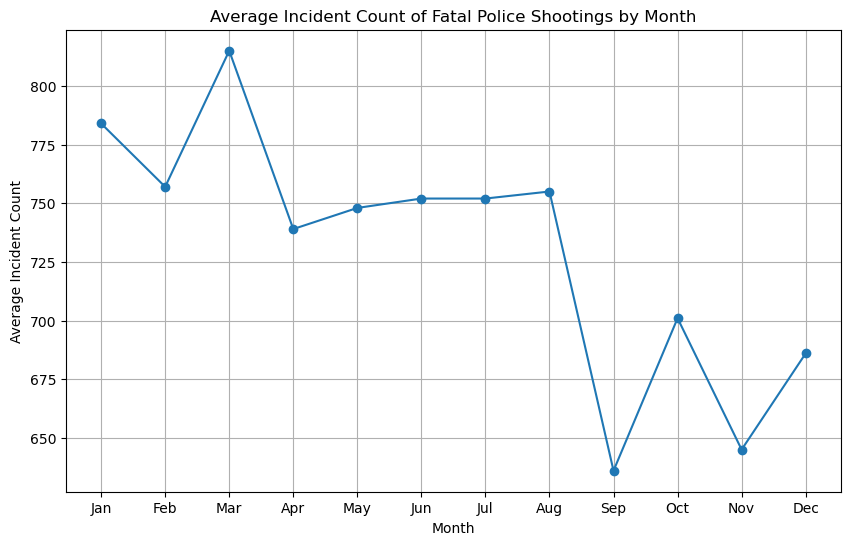

In [22]:
df['date'] = pd.to_datetime(df['date'])

# Extract month from the 'date' column
df['month'] = df['date'].dt.month

# Group by month and calculate the mean incident count for each month
monthly_incident_mean = df.groupby('month').size().mean(level=0)

# Plot the mean incident count for each month
plt.figure(figsize=(10, 6))
plt.plot(monthly_incident_mean.index, monthly_incident_mean.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Incident Count')
plt.title('Average Incident Count of Fatal Police Shootings by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

### Geospatial Clustering Analysis: Mapping Incident Hotspots in different states of US
The script performs following functionalities:

1. Filters the dataset to include only incidents in the specified state.
2. Extract latitude and longitude columns for clustering.
3. Impute missing values with the mean.
4. Applies K-Means clustering with a specified number of clusters.
5. Creates a folium map centered around the mean latitude and longitude.
6. Saves the interactive map as an HTML file with the specified path.

In [ ]:
def create_state_cluster_map(df, state_name, n_clusters=5, save_path='cluster_map.html'):
    # Step 1: Filter data for incidents in the specified state
    state_data = df[df['state'] == state_name]

    # Step 2: Extract the latitude and longitude for clustering
    locations = state_data[['latitude', 'longitude']].values

    # Step 3: Impute missing values with the mean
    imputer = SimpleImputer(strategy='mean')
    locations = imputer.fit_transform(locations)

    # Step 4: Perform K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(locations)  # Obtain cluster assignments

    # Step 5: Create a map
    initial_location = [locations[:, 0].mean(), locations[:, 1].mean()]  # Set the initial map center
    m = folium.Map(location=initial_location, zoom_start=6)  # Set the initial zoom level

    # Create FastMarkerCluster for efficiently handling a large number of markers
    marker_cluster = FastMarkerCluster(locations, popups=labels)

    # Add the marker cluster to the map
    marker_cluster.add_to(m)

    # Save the map as an HTML file
    m.save(save_path)

# Example 
create_state_cluster_map(df, 'state_name', n_clusters=5, save_path='cluster_map_stateName.html')

In [20]:
def get_top_and_last_locations_by_incident_count(df, state_name, top_n=5):
    # Step 1: Filter data for incidents in the specified state
    state_data = df[df['state'] == state_name]

    # Step 2: Group incidents by location
    location_counts = state_data['city'].value_counts()

    # Step 3: Find the top locations
    top_locations = location_counts.head(top_n)

    # Step 4: Find the last counts
    last_locations = location_counts.tail()

    return top_locations, last_locations

# Example 
state_name = 'CA'
top_locations, last_locations = get_top_and_last_locations_by_incident_count(df, state_name)
print(f"Top Locations in {state_name} State by Incident Count:")
print(top_locations)

print(f"\nLast Locations in {state_name} State by Incident Count:")
print(last_locations)

Top Locations in CA State by Incident Count:
Los Angeles    125
Bakersfield     35
San Diego       30
Fresno          30
San Jose        24
Name: city, dtype: int64

Last Locations in CA State by Incident Count:
San Mateo                    1
University City              1
Barona Indian Reservation    1
Del Mar                      1
Trabuco Canyon               1
Name: city, dtype: int64


In [14]:
def get_top_and_last_counties_by_incident_count(df, state_name, top_n=5):
    # Step 1: Filter data for incidents in the specified state
    state_data = df[df['state'] == state_name]

    # Step 2: Group incidents by county
    county_counts = state_data['county'].value_counts()

    # Step 3: Find the top counties
    top_counties = county_counts.head(top_n)

    # Step 4: Find the last counts
    last_counties = county_counts.tail()

    return top_counties, last_counties

# Example Usage
state_name = 'CA'
top_counties, last_counties = get_top_and_last_counties_by_incident_count(df, state_name)
print(f"Top Counties in {state_name} State by Incident Count:")
print(top_counties)

print(f"\nLast Counties in {state_name} State by Incident Count:")
print(last_counties)

Top Counties in CA State by Incident Count:
Los Angeles       168
San Bernardino     46
San Diego          42
Riverside          42
Orange             34
Name: county, dtype: int64

Last Counties in CA State by Incident Count:
Nevada       1
Sutter       1
Del Norte    1
Yolo         1
Glenn        1
Name: county, dtype: int64


### Geospatial Clustering Analysis: Mapping Incident Hotspots in different cities of US
The script performs following functionalities:

1. Filters the dataset to include only incidents in the specified city.
2. Extract latitude and longitude columns for clustering.
3. Impute missing values with the mean.
4. Applies K-Means clustering with a specified number of clusters.
5. Creates a folium map centered around the mean latitude and longitude.
6. Saves the interactive map as an HTML file with the specified path.

In [ ]:
def create_cluster_map(df, city_name, n_clusters=5, save_path='cluster_map.html'):
    # Step 1: Filter data for incidents in the specified city
    city_data = df[df['city'] == city_name]

    # Step 2: Extract the latitude and longitude for clustering
    locations = city_data[['latitude', 'longitude']].values

    # Step 3: Impute missing values with the mean
    imputer = SimpleImputer(strategy='mean')
    locations = imputer.fit_transform(locations)

    # Step 4: Perform K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(locations)  # Obtain cluster assignments

    # Step 5: Create a map
    initial_location = [locations[:, 0].mean(), locations[:, 1].mean()]  # Set the initial map center
    m = folium.Map(location=initial_location, zoom_start=10)  # Set the initial zoom level

    # Create FastMarkerCluster for efficiently handling a large number of markers
    marker_cluster = FastMarkerCluster(locations, popups=labels)

    # Add the marker cluster to the map
    marker_cluster.add_to(m)

    # Save the map as an HTML file
    m.save(save_path)

# Example 
create_cluster_map(df, 'city_name', n_clusters=5, save_path='cluster_map_cityName.html')

In [16]:
def get_incident_counts_by_location(df, city_name, top_n=5):
    # Step 1: Filter data for incidents in the specified city
    city_data = df[df['city'] == city_name]

    # Step 2: Create a new DataFrame to store the results
    location_data = pd.DataFrame()

    # Step 3: Impute missing or NaN values with the mean for latitude and longitude
    imputer = SimpleImputer(strategy='mean')
    city_data[['latitude', 'longitude']] = imputer.fit_transform(city_data[['latitude', 'longitude']])

    # Step 4: Initialize a geolocator
    geolocator = Nominatim(user_agent="incident_locator")

    # Step 5: Define a function to get location names from latitude and longitude
    def get_location_name(lat, lon):
        location = geolocator.reverse(Point(lat, lon), exactly_one=True)
        if location:
            return location.address
        else:
            return "Location not found"

    # Step 6: Apply the function to the city data
    location_data['Location'] = city_data.apply(lambda row: get_location_name(row['latitude'], row['longitude']), axis=1)

    # Step 7: Get the count of incidents in each location
    incident_counts = location_data['Location'].value_counts()

    return incident_counts.head(top_n)

# Example 
city_name = 'Atlanta'
top_incident_locations = get_incident_counts_by_location(df, city_name)
print(f"Top Incident Locations in {city_name}:")
print(top_incident_locations)

Top Incident Locations in Atlanta:
Georgia World Congress Center, 285, Baker Street Northwest, Five Points, Atlanta, Fulton County, Georgia, 30313, United States    2
3066, Chamblee Tucker Road, DeKalb County, Georgia, 30341, United States                                                          1
1596, James Jackson Parkway Northwest, Chattahoochee, Atlanta, Fulton County, Georgia, 30318, United States                       1
300, University Avenue, Pittsburgh, Atlanta, Fulton County, Georgia, 30310, United States                                         1
Akers Mill Road Southeast, Cobb County, Georgia, 30339, United States                                                             1
Name: Location, dtype: int64


### Age distribution of individuals involved in fatal police incidents

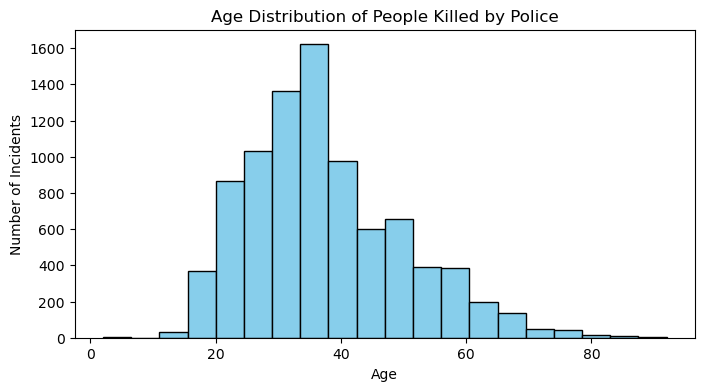

In [23]:
# Plot the age distribution
plt.figure(figsize=(8,4))
plt.hist(df['age'].dropna(), bins=20, edgecolor='black', color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of Incidents')
plt.title('Age Distribution of People Killed by Police')
plt.show()

### Demographic Insights: Proportional Analysis of Fatal Police Shootings by Age Groups

The script performs following functionalities:

1. Defines age group categories using bins and corresponding labels.
2. Groups the data based on the defined age groups and calculate the proportions of fatal police shootings in each group.
3. Create a bar plot to visually represent the proportion of fatal police shootings in each age group.

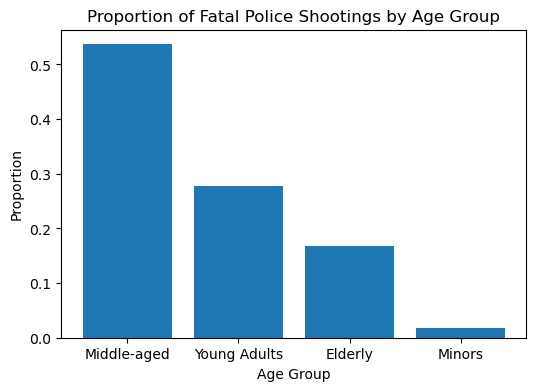

In [24]:
# Load data
df = merged_data

# Step 1: Define age group categories
age_bins = [0, 18, 30, 50, float('inf')]  # Define bins for age groups
age_labels = ['Minors', 'Young Adults', 'Middle-aged', 'Elderly']  # Labels for age groups

# Step 2: Group data and calculate proportions
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
age_group_counts = df['age_group'].value_counts()
total_shootings = len(df)
proportions = age_group_counts / total_shootings

# Step 3: Visualization using a bar plot
plt.figure(figsize=(6, 4))
plt.bar(proportions.index, proportions.values)
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.title('Proportion of Fatal Police Shootings by Age Group')
plt.show()

### Comparative Proportions of Fatal Police Shootings Across Age Groups: White vs. Black Populations

The below script generates a grouped bar plot comparing the proportions of fatal police shootings across age groups for the White and Black populations.

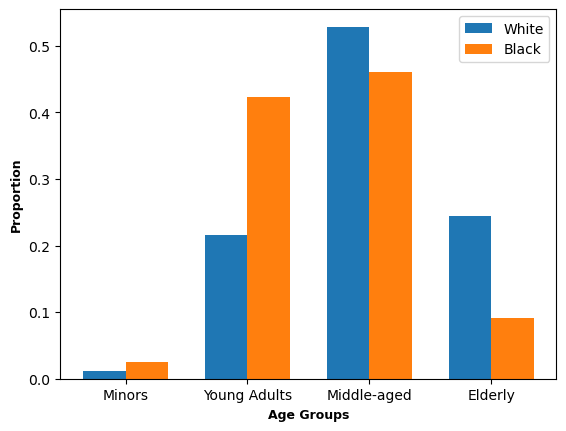

In [26]:
# List of age groups
age_groups = ['Minors', 'Young Adults', 'Middle-aged', 'Elderly']

# Proportions of fatal police shootings for the White population across age groups
white_proportions = [0.011054, 0.215692, 0.528444, 0.244810]  

# Proportions of fatal police shootings for the Black population across age groups
black_proportions = [0.024679, 0.423136, 0.460668, 0.091517]  

# Define width of the bars
bar_width = 0.35

# Set the positions of the bars on X-axis
r1 = np.arange(len(age_groups))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.bar(r1, white_proportions, width=bar_width, label='White')
plt.bar(r2, black_proportions, width=bar_width, label='Black')

# Add labels to the plot
plt.xlabel('Age Groups', fontweight='bold', fontsize=9)
plt.ylabel('Proportion', fontweight='bold', fontsize=9)
plt.xticks([r + bar_width/2 for r in range(len(age_groups))], age_groups)
plt.legend()

# Show the plot
plt.show()

### Temporal Analysis of Monthly Police Incident Counts Based on Armed Types

The script performs following functionalities:

1. Retrieves unique values in the 'armed_with' column, representing different types of arms involved in incidents.
2. Creates a time series plot for each unique armed type, showing the monthly count of incidents over time.
3. Stores the count of incidents for each armed type in a dictionary ('armed_type_counts').
4. Displays the plot showing the monthly count of incidents by armed type.

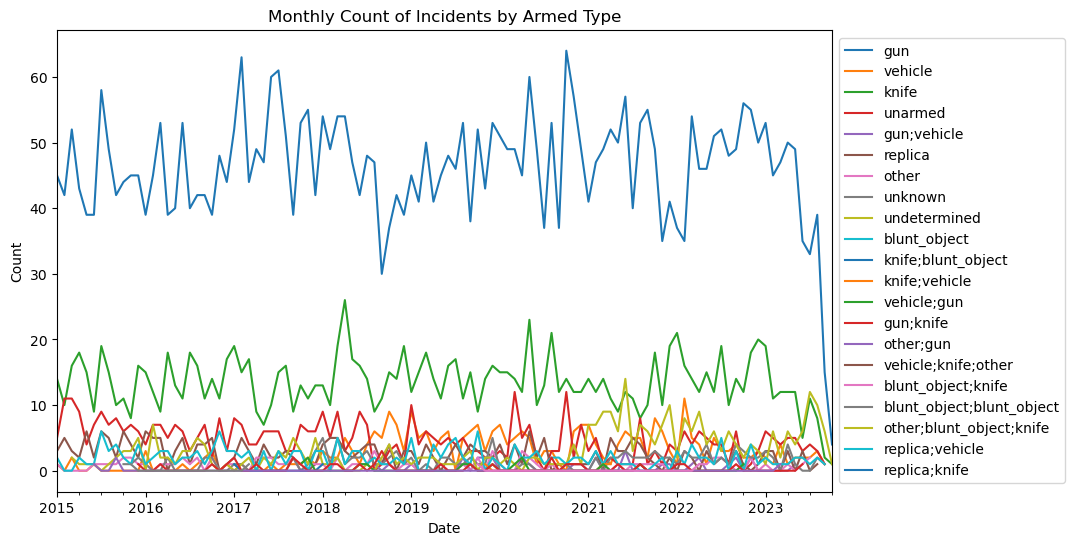

gun: 4899 incidents
vehicle: 297 incidents
knife: 1428 incidents
unarmed: 497 incidents
gun;vehicle: 33 incidents
replica: 264 incidents
other: 84 incidents
unknown: 129 incidents
undetermined: 323 incidents
blunt_object: 209 incidents
knife;blunt_object: 2 incidents
knife;vehicle: 3 incidents
vehicle;gun: 14 incidents
gun;knife: 32 incidents
other;gun: 4 incidents
vehicle;knife;other: 1 incidents
blunt_object;knife: 2 incidents
blunt_object;blunt_object: 2 incidents
other;blunt_object;knife: 1 incidents
replica;vehicle: 1 incidents
replica;knife: 1 incidents


In [27]:
# Get unique armed types
unique_armed_types = df['armed_with'].unique()

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Create a dictionary to store counts of each armed type
armed_type_counts = {}

# Create a separate time series plot for each armed type
for armed_type in unique_armed_types:
    subset = df[df['armed_with'] == armed_type]
    
    if not subset.empty:
        subset['date'] = pd.to_datetime(subset['date'])
        subset.set_index('date', inplace=True)

        subset.resample('M').count()['armed_with'].plot(legend=True, label=armed_type, ax=ax)
        
        # Store the count of this armed type in the dictionary
        armed_type_counts[armed_type] = len(subset)

# Set the title and labels
ax.set_title('Monthly Count of Incidents by Armed Type')
ax.set_xlabel('Date')
ax.set_ylabel('Count')

# Move the legend outside the graph
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

# Print the count of each armed type
for armed_type, count in armed_type_counts.items():
    print(f'{armed_type}: {count} incidents')

### Logistic Regression Analysis on Police Shooting Incidents: Predicting Gender Based on Threat Type, Flee Status, Armed Status, and Race

The script performs the following tasks:

1. selects relevant features, including 'threat_type,' 'flee_status,' 'armed_with,' and 'race'
2. Categorical variables within the chosen features are label-encoded
3. The dataset is split into training and testing sets
4. A logistic regression model is initialized and fitted with the training data
5. The trained model predicts the target variable on the test set
6. The accuracy of the logistic regression model is calculated
7. Prints a classification report, providing precision, recall, and F1-score for each class

In [29]:
# Selecting relevant features
selected_features = ['threat_type', 'flee_status', 'armed_with', 'race']

# Label encoding categorical variables
le = LabelEncoder()
for feature in selected_features:
    df[feature] = le.fit_transform(df[feature])

# Defining input features (X) and target variable (y)
X = df[selected_features]
y = df['gender']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the logistic regression model: {accuracy * 100:.2f}%")

print(classification_report(y_test, y_pred))

Accuracy of the logistic regression model: 95.20%
              precision    recall  f1-score   support

      female       0.00      0.00      0.00        79
        male       0.95      1.00      0.98      1567

    accuracy                           0.95      1646
   macro avg       0.48      0.50      0.49      1646
weighted avg       0.91      0.95      0.93      1646



### Analysis of Top 10 Police Agencies Involved in Fatal Shootings: Total Shootings and Findings by Type
The script identifies and selects the top 10 police agencies with the highest total shootings, then visualizes this data to create a horizontal bar chart, illustrating total shootings by agency and distinguishing findings by type.

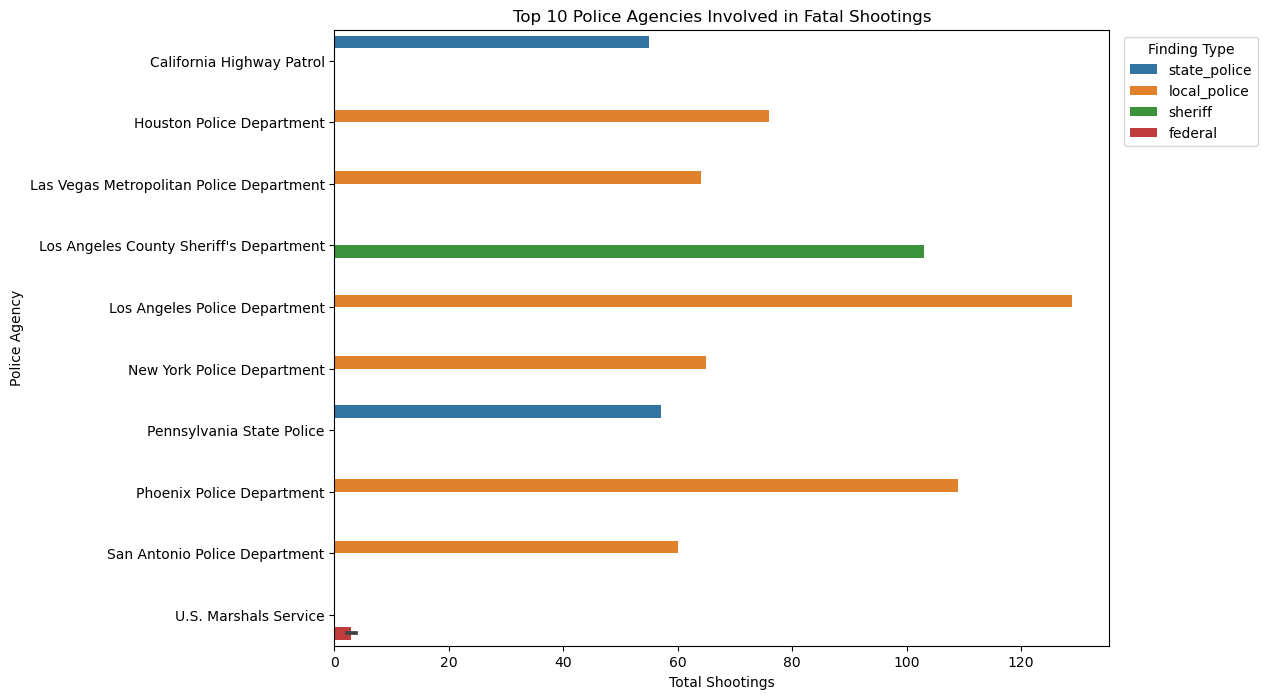

In [33]:
# Find the top 10 agencies with the highest total shootings
top_10_agencies = df_agencies.groupby('name')['total_shootings'].sum().nlargest(10).index

# Filtering the data for only the top 10 agencies
top_10_agencies_data = df_agencies[df_agencies['name'].isin(top_10_agencies)]

# Plotting a horizontal bar chart to show total shootings by the top 10 police agencies and their findings
plt.figure(figsize=(10, 8))
sns.barplot(x='total_shootings', y='name', hue='type', data=top_10_agencies_data, orient='h')
plt.title('Top 10 Police Agencies Involved in Fatal Shootings')
plt.xlabel('Total Shootings')
plt.ylabel('Police Agency')
plt.legend(title='Finding Type', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

### Temporal Trends in Flee Status: A Monthly Analysis of Police Shooting Incidents

The script performs the following tasks:

1. Converts the 'date' column in the dataset to datetime format 
2. Creates new columns 'month' and 'year' in the dataset by extracting month and year information from the 'date' column 
3. Groups the dataset by 'year', 'month', and 'flee_status', counts the occurrences, and reshapes the result into a pivot table
4. Plots the temporal variation of flee statuses over months using a line plot.

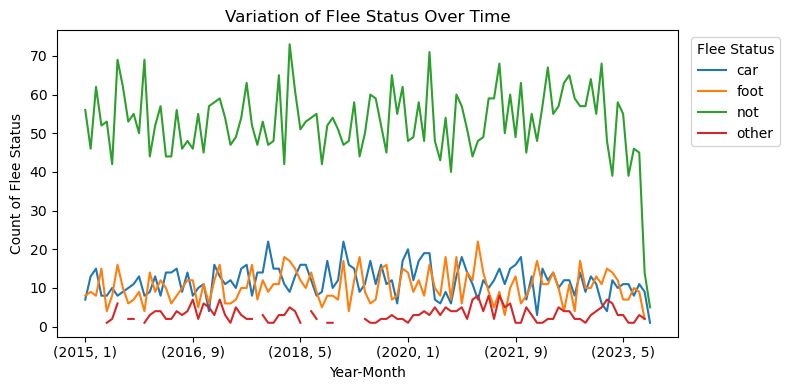

In [26]:
# Load the dataset
data = merged_data

# Assuming 'date' column exists in the dataset and contains timestamps
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Extracting month and year information from the 'date' column
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# Counting flee statuses by month
monthly_flee_count = data.groupby(['year', 'month', 'flee_status']).size().unstack()

# Plotting the temporal variation of flee statuses over months
monthly_flee_count.plot(kind='line', figsize=(8, 4))
plt.title('Variation of Flee Status Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Count of Flee Status')
plt.legend(title='Flee Status', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Temporal Analysis of Flee Status Variation in Fatal Police Shootings

This script performs the following functionalities:

1. Converts the 'date' column to datetime format.
2. Extracts month, year, and day of the week information from the 'date' column.
3. Groups the data by year, month, and flee status to count the occurrences of each flee status.
4. Creates a monthly flee count dataframe and a yearly flee count dataframe.
5. Creates line plots for each flee status, showcasing their variation over months and years.

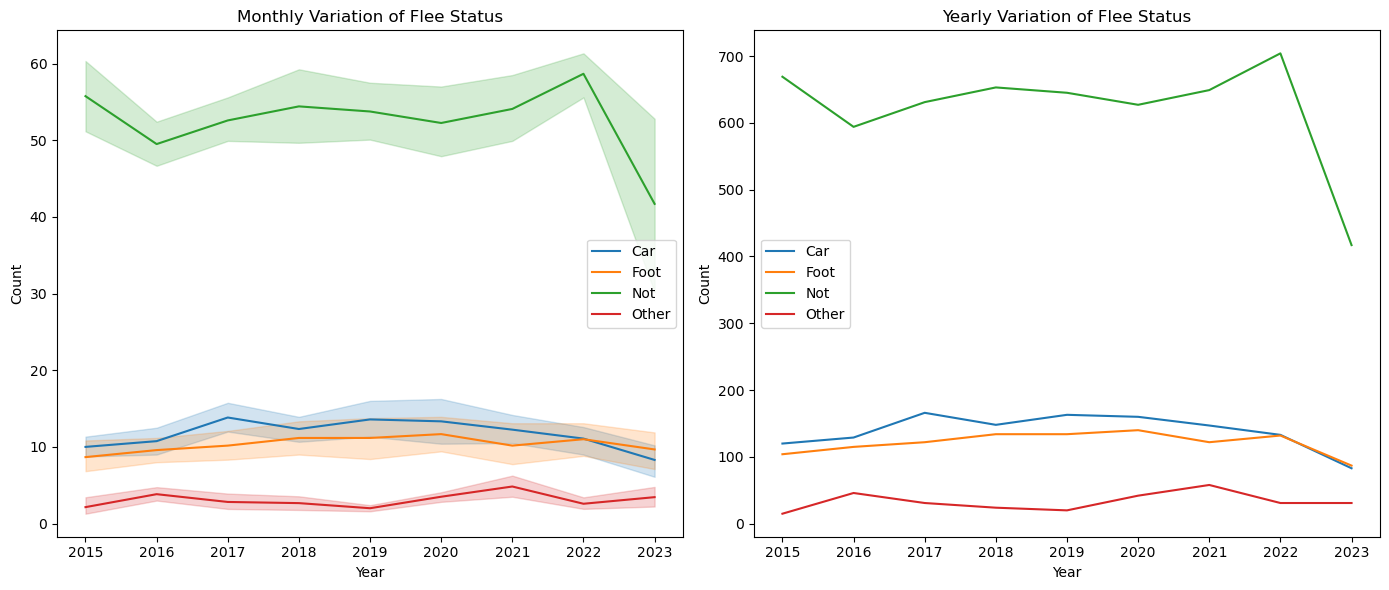

In [25]:
# Load the dataset
data = merged_data

# Assuming 'date' column exists in the dataset and contains timestamps
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Extracting month, year, and day of the week information from the 'date' column
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# Counting flee statuses by month and year
monthly_flee_count = data.groupby(['year', 'month', 'flee_status']).size().unstack().reset_index()
yearly_flee_count = data.groupby(['year', 'flee_status']).size().unstack().reset_index()

# Rearrange columns to match the specified flee statuses
monthly_flee_count = monthly_flee_count[['year', 'month', 'car', 'foot', 'not', 'other']]
yearly_flee_count = yearly_flee_count[['year', 'car', 'foot', 'not', 'other']]

# Plotting the variation of flee statuses over months and years
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for flee_type in ['car', 'foot', 'not', 'other']:
    sns.lineplot(data=monthly_flee_count, x='year', y=flee_type, label=flee_type.capitalize())
plt.title('Monthly Variation of Flee Status')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()

plt.subplot(1, 2, 2)
for flee_type in ['car', 'foot', 'not', 'other']:
    sns.lineplot(data=yearly_flee_count, x='year', y=flee_type, label=flee_type.capitalize())
plt.title('Yearly Variation of Flee Status')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()